In [20]:
!wget 'https://raw.githubusercontent.com/Taravattt/Riga_Property_Price_Forecasting_Using_Machine_Learning/main/riga.csv'
!wget 'https://raw.githubusercontent.com/Taravattt/Riga_Property_Price_Forecasting_Using_Machine_Learning/main/riga_boundaries_polygon.json'

--2025-05-24 08:55:29--  https://raw.githubusercontent.com/Taravattt/Riga_Property_Price_Forecasting_Using_Machine_Learning/main/riga.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473050 (462K) [text/plain]
Saving to: ‘riga.csv’

riga.csv            100%[===================>] 461.96K  --.-KB/s    in 0.05s   

2025-05-24 08:55:29 (9.64 MB/s) - ‘riga.csv’ saved [473050/473050]

--2025-05-24 08:55:29--  https://raw.githubusercontent.com/Taravattt/Riga_Property_Price_Forecasting_Using_Machine_Learning/main/riga_boundaries_polygon.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.


In [22]:

import pandas as pd
import numpy as np
df = pd.read_csv("riga.csv")
df.head(5)

--2025-05-24 08:55:29--  https://raw.githubusercontent.com/Taravattt/Riga_Property_Price_Forecasting_Using_Machine_Learning/main/riga.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473050 (462K) [text/plain]
Saving to: ‘riga.csv.1’

riga.csv.1          100%[===================>] 461.96K  --.-KB/s    in 0.05s   

2025-05-24 08:55:29 (9.67 MB/s) - ‘riga.csv.1’ saved [473050/473050]

--2025-05-24 08:55:29--  https://raw.githubusercontent.com/Taravattt/Riga_Property_Price_Forecasting_Using_Machine_Learning/main/riga_boundaries_polygon.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,602.,Panel,All amenities,300.0,56.899798,24.098350
2,For sale,centrs,Ieroču 6,2,33.0,1.0,2.0,P. kara,Wood,Partial amenities,13500.0,56.975092,24.139884
3,For sale,Ķengarags,Maskavas 305,2,50.0,5.0,5.0,LT proj.,Panel,All amenities,34000.0,56.859788,24.308342
4,For rent,Teika,Zemgala gatve 80,3,76.0,3.0,12.0,Jaun.,Masonry,All amenities,490.0,56.977745,24.166042


In [23]:
df.op_type.value_counts()


,count
op_type,
For sale,2650
For rent,1507


<ipython-input-24-1599c4246b21>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  viz.legend()


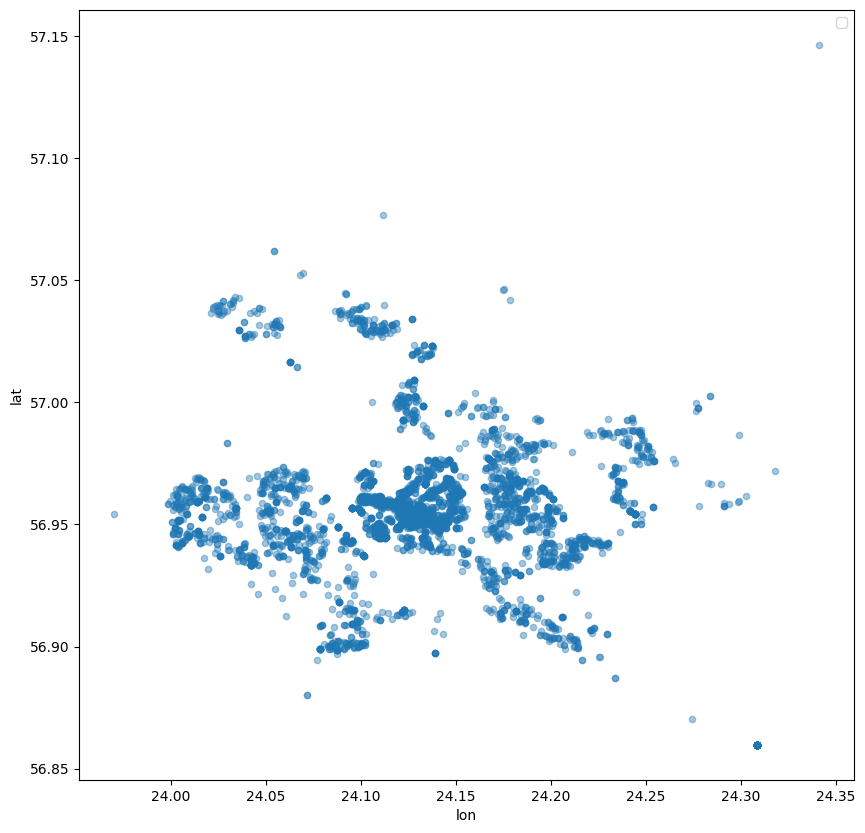

In [24]:

viz = df.plot(kind='scatter', x='lon', y='lat', alpha=0.4, figsize=(10,10))
viz.legend()

In [25]:
df.district.value_counts()


,count
district,
centrs,1373
Purvciems,323
Āgenskalns,227
Ziepniekkalns,197
Imanta,196
Ķengarags,191
Pļavnieki,187
Teika,124
Mežciems,112


In [26]:
from sklearn.utils import resample




def resample_by_district(df):
    df_result = pd.DataFrame(columns=df.columns)
    n_samples = np.minimum(df.district.value_counts()['centrs'], 500)
    for district in df.district.unique():
        df_district = df[df['district'] == district]
        df_resampled = resample(df_district,
                             replace=True,
                             n_samples=n_samples)
        df_result = pd.concat([df_result, df_resampled])
    return df_result



resample_by_district(df)['district'].value_counts()

<ipython-input-26-7e2a6728d433>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_result = pd.concat([df_result, df_resampled])


,count
district,
Purvciems,500
Ziepniekkalns,500
Iļģuciems,500
Berģi,500
Šķirotava,500
Dārzciems,500
Vecrīga,500
Bieriņi,500
Brekši,500


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
def print_df_info(df_train, df_test, df_val):
    print(len(df_train), 'train examples')
    print(len(df_test), 'validation examples')
    print(len(df_val), 'test examples')

In [29]:
df_sale = df[df['op_type'] == 'For sale']


df_sale_clean = df_sale[(df_sale.price < 300000) & (df_sale.area <160)
                  & (~((df_sale.price < 50000) &(df_sale.area > 80)))
                 & (~((df_sale.price < 100000)&(df_sale.area > 130)))
                 ].copy()

df_sale_train, df_sale_test = train_test_split(df_sale_clean, test_size=0.1)
df_sale_train, df_sale_val = train_test_split(df_sale_train, test_size=0.1)



dfs_sale = [df_sale_train, df_sale_val, df_sale_test]
print("For sale:")
print_df_info(*dfs_sale)

For sale:
2050 train examples
228 validation examples
254 test examples


In [30]:
df_rent = df[df['op_type'] == 'For rent']
# Final cleanup
df_rent_clean = df_rent[(df_rent.price < 1390) & (df_rent.area <125) & (df_rent.price > 60)
                  & (~((df_rent.price < 110) &(df_rent.area > 40)))
                 & (~((df_rent.price < 400)&(df_rent.area > 100)))
                  & (~((df_rent.price > 1000)&(df_rent.area < 70)))
                 ].copy()

df_rent_train, df_rent_test = train_test_split(df_rent_clean, test_size=0.1)
df_rent_train, df_rent_val = train_test_split(df_rent_train, test_size=0.1)


dfs_rent = [df_rent_train, df_rent_val, df_rent_test]
print("For rent:")
print_df_info(*dfs_rent)

For rent:
1033 train examples
115 validation examples
128 test examples


In [31]:
df_all_clean = pd.concat([df_sale_clean, df_rent_clean])
df_all_train, df_all_test = train_test_split(df_all_clean, test_size=0.1)
df_all_train, df_all_val = train_test_split(df_all_train, test_size=0.1)


dfs_all = [df_all_train, df_all_test, df_all_val]
print("All:")
print_df_info(*dfs_all)

All:
3084 train examples
381 validation examples
343 test examples


In [32]:
def input_fn(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('price')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    return ds.batch(batch_size)


def get_input_data_sets(batch_size, df_train, df_val, df_test):
    train_ds = input_fn(df_train, batch_size=batch_size)
    val_ds = input_fn(df_val, shuffle=False, batch_size=batch_size)
    test_ds = input_fn(df_test, shuffle=False, batch_size=batch_size)
    return [train_ds, val_ds, test_ds]

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import feature_column
from tensorflow.keras import layers

In [34]:
tf.__version__

'2.12.0-rc0'

In [35]:
feature_columns = []

In [36]:
for header in ['rooms', 'floor', 'total_floors']:
    feature_columns.append(feature_column.numeric_column(header))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [37]:

area = feature_column.numeric_column("area")
area_boundaries = [25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 155.0, 175.0, 225.0, 275.0, 325.0, 375.0, 425.0]
area_buckets = feature_column.bucketized_column(area, boundaries=area_boundaries)
feature_columns.append(area_buckets)
print("Area boundaries", area_boundaries)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Area boundaries [25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 155.0, 175.0, 225.0, 275.0, 325.0, 375.0, 425.0]


In [38]:
categorical_headers = ['op_type', 'house_seria', 'house_type', 'condition']
for header in categorical_headers:
    categorical = feature_column.categorical_column_with_vocabulary_list(header, df[header].unique())
    feature_columns.append(feature_column.indicator_column(categorical))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [39]:
len(df.district.unique())


48

In [40]:
district = feature_column.categorical_column_with_vocabulary_list('district', df.district.unique())

In [41]:
feature_columns.append(feature_column.indicator_column(district))

In [42]:
feature_lat = feature_column.numeric_column("lat")
feature_lon = feature_column.numeric_column("lon")

In [43]:
def get_equidistant_coords(axis_key, n_coords):
    geo_min = df[axis_key].min()
    geo_max = df[axis_key].max()
    geo_range = geo_max - geo_min
    geo_step = geo_range / n_coords
    return np.arange(geo_min, geo_max, geo_step).tolist()



def get_equidistant_points(n_coords):
    latitudes = get_equidistant_coords('lat', n_coords)
    longitudes = get_equidistant_coords('lon', n_coords)
    xv, yv = np.meshgrid(latitudes, longitudes, sparse=False, indexing='ij')
    points = []
    for i in range(n_coords):
        for j in range(n_coords):
            points.append([xv[i,j], yv[i,j]])

    return points


print("Equidistant longitudes:", get_equidistant_coords("lon", 2))
print("Equidistant latitudes:", get_equidistant_coords("lat", 2))
print("Equidistant point grid:", get_equidistant_points(2))

Equidistant longitudes: [23.9702807, 24.1555732]
Equidistant latitudes: [56.8597884, 57.00315165]
Equidistant point grid: [[56.8597884, 23.9702807], [56.8597884, 24.1555732], [57.00315165, 23.9702807], [57.00315165, 24.1555732]]


In [44]:
import folium


def get_point_to_rect(n_tiles):
    dx = (df['lat'].max() - df['lat'].min()) / n_tiles
    dy = (df['lon'].max() - df['lon'].min()) / n_tiles
    def point_to_rect(x,y):
        return [
            [x,y],
            [x+dx, y],
            [x+dx, y+dy],
            [x, y+dy]
        ]
    return point_to_rect


def get_tiles(n_tiles):
    points = get_equidistant_points(n_tiles)
    point_to_rect = get_point_to_rect(n_tiles)
    return list(map(lambda point: point_to_rect(*point), points))


def plot_tiles(tiles):
    tiles_map = folium.Map(
        location=[56.946285, 24.105078],
        tiles='cartodbpositron',
        zoom_start=11,
    )
    for points in tiles:
        folium.Rectangle(bounds=points, color='#ff7800', fill=True, fill_color='#ffff00', fill_opacity=0.2).add_to(tiles_map)

    return tiles_map

In [45]:
import json


with open("riga_boundaries_polygon.json") as f:
    geometry_collection = json.load(f)
    riga_boundaries = geometry_collection['geometries'][0]

In [46]:
from shapely.geometry import shape, Point


def is_within_riga_boundaries(y, x):

    riga_multipolygon = shape(riga_boundaries)
    return Point(x,y).within(riga_multipolygon)

is_within_riga_boundaries(56.946285, 24.105078)

True

In [47]:
from shapely.geometry import Point



def get_tiles_within_riga_boundaries(n_tiles):
    points = get_equidistant_points(n_tiles)
    points_filtered = list(filter(lambda point: is_within_riga_boundaries(*point), points))
    point_to_rect = get_point_to_rect(n_tiles)
    return list(map(lambda point: point_to_rect(*point), points_filtered))

In [48]:
original_tiles = get_tiles(30)
filtered_tiles = get_tiles_within_riga_boundaries(30)
print("Original tile count:", len(original_tiles))
print("Filtered tile count:", len(filtered_tiles))

Original tile count: 900
Filtered tile count: 373


In [49]:
n_tiles = 50



points = get_equidistant_points(n_tiles)




points_filtered = list(filter(lambda point: is_within_riga_boundaries(*point), points))



latitudes, longitudes = zip(*points_filtered)



latitude_boundaries = list(set(latitudes))
longitude_boundaries = list(set(longitudes))
latitude_boundaries.sort()
longitude_boundaries.sort()

feature_lat = feature_column.numeric_column('lat')
feature_lon = feature_column.numeric_column('lon')


bucketized_lat = feature_column.bucketized_column(feature_lat, boundaries=latitude_boundaries)
bucketized_lon = feature_column.bucketized_column(feature_lon, boundaries=longitude_boundaries)


# Create a crossed column from the bucketized values
crossed_geo = feature_column.crossed_column([bucketized_lat, bucketized_lon], hash_bucket_size=n_tiles*n_tiles)
crossed_geo = feature_column.indicator_column(crossed_geo)
feature_columns.append(crossed_geo)

Instructions for updating:
Use `tf.keras.layers.experimental.preprocessing.HashedCrossing` instead for feature crossing when preprocessing data to train a Keras model.


In [50]:
!pip install pandas
!pip install tensorflow==2.12.0rc0
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import DenseFeatures
import tensorflow as tf

In [51]:
kernel_initializer='he_uniform'


In [52]:
# Initializing array to store feature columns
feature_columns = []
# Create numeric columns
for header in ['rooms', 'floor', 'total_floors']:
    feature_columns.append(feature_column.numeric_column(header))

# Create bucketized columns
area = feature_column.numeric_column("area")
area_boundaries = [25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 155.0, 175.0, 225.0, 275.0, 325.0, 375.0, 425.0]
area_buckets = feature_column.bucketized_column(area, boundaries=area_boundaries)
feature_columns.append(area_buckets)
print("Area boundaries", area_boundaries)

# Create categorical one-hot encoded columns
categorical_headers = ['op_type', 'house_seria', 'house_type', 'condition', 'district']
for header in categorical_headers:
    categorical = feature_column.categorical_column_with_vocabulary_list(header, df[header].unique())

# Create numeric latitude columns first
feature_lat = feature_column.numeric_column("lat")
feature_lon = feature_column.numeric_column("lon")
latitude_boundaries = get_equidistant_coords('lat', n_tiles)
longitude_boundaries = get_equidistant_coords('lon', n_tiles)
bucketized_lat = feature_column.bucketized_column(feature_lat, boundaries=latitude_boundaries)
bucketized_lon = feature_column.bucketized_column(feature_lon, boundaries=longitude_boundaries)


crossed_geo = feature_column.crossed_column([bucketized_lat, bucketized_lon], hash_bucket_size=n_tiles*n_tiles)
crossed_geo = feature_column.indicator_column(crossed_geo)
feature_columns.append(crossed_geo)

Area boundaries [25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 155.0, 175.0, 225.0, 275.0, 325.0, 375.0, 425.0]


In [53]:
kernel_initializer = 'he_uniform'
def create_shallow_model(feature_columns):
    model = Sequential()

    #Input Layer
    model.add(DenseFeatures(feature_columns))

    #Hidden Layers
    model.add(Dense(128, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, kernel_initializer=kernel_initializer, activation='relu'))
    #Output Layer
    model.add(Dense(1, kernel_initializer=kernel_initializer, activation='relu'))

    return model
#1

In [54]:
def create_deep_model(feature_columns):
    model = Sequential()

    #Input Layer
    model.add(DenseFeatures(feature_columns))

    #Hidden Layers
    model.add(Dense(512, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dense(32, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dense(16, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dense(8, kernel_initializer=kernel_initializer, activation='relu'))

    #Output Layer
    model.add(Dense(1, kernel_initializer=kernel_initializer, activation='relu'))

    return model
    #2

In [55]:
def compile_train_evaluate(model, min_delta, train_ds, val_ds, test_ds):
    model.compile(
      loss=tf.keras.losses.MeanAbsoluteError(),
      optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
      metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', min_delta=min_delta, patience=20,verbose=1)
    ]
    history = model.fit(train_ds,
              validation_data=val_ds,
              callbacks=callbacks,
              epochs=150,
              verbose=0)
    loss, mae = model.evaluate(test_ds)
    return [history, mae]

In [56]:
batch_sizes = [64]
model_names = ['Deep']
model_creators = [lambda: create_deep_model(feature_columns)]
dataframe_names = ['All']
dataframes = [dfs_all]

models = {}
histories = {}
results = {}

for i, dfs in enumerate(dataframes, start=0):
    df_name = dataframe_names[i]
    for j, create_model in enumerate(model_creators, start=0):
        model_name = model_names[j]
        for batch_size in batch_sizes:
            key = "[model=" + model_name + "][dataframe=" +  df_name + "][batch_size=" + str(batch_size) + "]"
            models[key] = create_model()
            datasets = get_input_data_sets(batch_size, *dfs)
            min_delta = 5 if "Rent" in key else 100
            print('Evaluating configuration: ' + key)
            history, mae = compile_train_evaluate(models[key], min_delta, *datasets)
            results[key] = mae
            histories[key] = history
            models[key].save('models/' + key.replace('[', '_').replace(']', '_').replace('=', '_') + '.h5')
            #3

Evaluating configuration: [model=Deep][dataframe=All][batch_size=64]


Epoch 98: early stopping
6/6 [==============================] - 0s 8ms/step - loss: 31471.0352 - mean_absolute_error: 31471.0352


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [57]:
results

{'[model=Deep][dataframe=All][batch_size=64]': 31471.03515625}

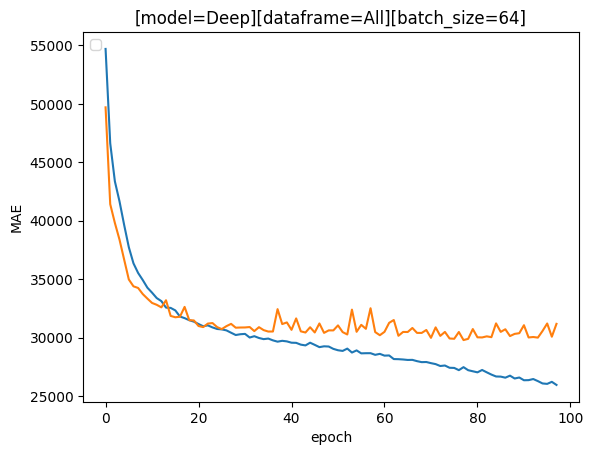

In [58]:
def plot_mae(history, name):
    plt.title(name)
    plt.ylabel('MAE')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.show()

for name, history in histories.items():
    plot_mae(history, name)
    #4

In [59]:
#%%
def get_test_property(op_type):
    return {
        'op_type': [op_type],
        'district': ['Teika'],
        'street': [''],
        'rooms': [3],
        'area': [75.3],
        'floor': [3],
        'total_floors': [3],
        'house_seria': ['Staļina'],
        'house_type': ['Brick'],
        'condition': ['All amenities'],
        'lat': [56.967406],
        'lon': [24.186564],
        'price': [0]
    }

In [60]:
def create_test_ds(batch_size, real_estate_object):

    real_estate_object_list = {key: [value[0]] for key, value in real_estate_object.items()}

    test_df = pd.DataFrame.from_dict(real_estate_object)
    if batch_size > 1:


        new_rows_df = pd.concat([test_df]*(batch_size-1), ignore_index=True)
        test_df = pd.concat([test_df, new_rows_df], ignore_index=True)


    for col in ['rooms', 'floor', 'total_floors', 'area', 'lat', 'lon', 'price']:
        if col in test_df.columns:
            test_df[col] = pd.to_numeric(test_df[col])

    return input_fn(test_df, shuffle=False, batch_size=batch_size)
    #5

In [61]:
rent_test_ds = create_test_ds(64, get_test_property('For rent'))

for key in models.keys():
    if "Rent" in key or "All" in key:
        print("Rent prediction:", models[key].predict(rent_test_ds)[0][0], "EUR by", key)

1/1 [==============================] - 1s 546ms/step
Rent prediction: 107879.89 EUR by [model=Deep][dataframe=All][batch_size=64]


In [62]:
sale_test_ds = create_test_ds(64, get_test_property('For sale'))

for key in models.keys():
    if "Sale" in key or "All" in key:
        print("Sale prediction:", models[key].predict(sale_test_ds)[0][0], "EUR by", key)

1/1 [==============================] - 0s 37ms/step
Sale prediction: 107879.89 EUR by [model=Deep][dataframe=All][batch_size=64]


In [63]:
print('TensorFlow Version: {}'.format(tf.__version__))


TensorFlow Version: 2.12.0-rc0


In [64]:
models.keys()


dict_keys(['[model=Deep][dataframe=All][batch_size=64]'])

In [65]:
model = models['[model=Deep][dataframe=All][batch_size=64]']
tf.keras.models.save_model(model, 'models/deep_all_64.h5', save_format='h5')

In [66]:
model.save_weights('weights.h5')
